In [1]:
# UNCOMMENT IF USING COLAB VM

# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = "CS589/H3"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
# %cd /content/drive/My\ Drive/$FOLDERNAME/cs682/datasets/
# !bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME
%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/My Drive/CS589/H3


In [ ]:
from utils import *
from decision_tree import *
from cross_validation import *
from random_forest import *

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load(name):
  if name=="wine":
    X, y = get_wine_dataset()
    f = np.zeros(X.shape[1])
    return X,y,f
  elif name == "house_votes":
    X,y = get_house_votes_dataset()
    f = np.ones(X.shape[1])
    return (X,y,f)
  elif name == "cancer":
    X,y = get_cancer_dataset()
    f = np.zeros(X.shape[1])
    return (X,y,f)
  elif name == "contraceptive":
    X,y = get_contraceptive_dataset()
    f = np.ones(X.shape[1])
    f[0] = 0
    f[3] = 0
    return (X,y,f)

In [ ]:
def experiment(classifier,dataloader,stop_criteria=None):
  ntree_vals = [1,5,10,20,30,40,50]
  m_accuracies = []
  m_recalls = []
  m_precisions = []
  m_f1_scores = []
  for ntree_val in ntree_vals:

    accuracies = []
    recalls = []
    precisions = []
    f1_scores = []

    for train,test in dataloader.get_folds():
      X_train,y_train = train
      X_test,y_test = test
      classifier.train(X_train,y_train,dataloader.feature_type,ntree=ntree_val,stop_criteria=stop_criteria)
      predictions = classifier.predict(X_test)
      acc = dataloader.accuracy(predictions,y_test)
      accuracies.append(acc)
      # print("Accuracy ",acc)
      recall = dataloader.recall(predictions,y_test)
      recalls.append(recall)
      # print("Recall ",recall)
      precision = dataloader.precision(predictions,y_test)
      precisions.append(precision)
      # print("Precision ",precision)
      f1_score = dataloader.f1_score(predictions,y_test)
      f1_scores.append(f1_score)
      # print("F1 Score  ",f1_score)

    accuracies = np.asarray(accuracies)
    recalls = np.asarray(recalls)
    precisions = np.asarray(precisions)
    f1_scores = np.asarray(f1_scores)
    print("ntree ",ntree_val)
    print("Avg. Accuracy ", np.average(accuracies)*100)
    print("Avg. Recall ", np.average(recalls))
    print("Avg. Precision ", np.average(precisions))
    print("Avg. F-1 Score ", np.average(f1_scores))
    print()
    m_accuracies.append(np.average(accuracies))
    m_recalls.append(np.average(recalls))
    m_precisions.append(np.average(precisions))
    m_f1_scores.append(np.average(f1_scores))

  m_accuracies = np.asarray(m_accuracies)
  m_recalls = np.asarray(m_recalls)
  m_precisions = np.asarray(m_precisions)
  m_f1_scores = np.asarray(m_f1_scores)
  fig, axs = plt.subplots(4,sharex=True)
  fig.suptitle('Metrics')
  axs[0].plot(ntree_vals, m_accuracies)
  axs[1].plot(ntree_vals, m_recalls)
  axs[2].plot(ntree_vals, m_precisions)

  axs[3].plot(ntree_vals, m_f1_scores)
  best_n = ntree_vals[np.argmax(m_accuracies)]
  print("Best n : ", best_n)
  print("Best acc: ", np.max(m_accuracies)*100)

  axs[3].set_xlabel("ntree")
  axs[3].set_ylabel("F-1 Score")
  axs[2].set_ylabel("Precision")
  axs[1].set_ylabel("Recall")
  axs[0].set_ylabel("Accuracy")
  

ntree  1
Avg. Accuracy  69.14285714285715
Avg. Recall  0.5761505161505162
Avg. Precision  0.6458041958041958
Avg. F-1 Score  0.6642720123935939

ntree  5
Avg. Accuracy  69.52380952380952
Avg. Recall  0.5950549450549449
Avg. Precision  0.5940242763772176
Avg. F-1 Score  0.6362782593093657

ntree  10
Avg. Accuracy  76.38095238095238
Avg. Recall  0.6867743367743369
Avg. Precision  0.7725318731611638
Avg. F-1 Score  0.7676688639778739

ntree  20
Avg. Accuracy  76.38095238095237
Avg. Recall  0.676924186924187
Avg. Precision  0.7475776075776075
Avg. F-1 Score  0.7526892993478015

ntree  30
Avg. Accuracy  68.38095238095238
Avg. Recall  0.5699056499056498
Avg. Precision  0.7297386245773343
Avg. F-1 Score  0.7034812241343972

ntree  40
Avg. Accuracy  71.80952380952381
Avg. Recall  0.6251959151959151
Avg. Precision  0.7383342352092352
Avg. F-1 Score  0.7275135231262194

ntree  50
Avg. Accuracy  77.9047619047619
Avg. Recall  0.7039826839826839
Avg. Precision  0.793996003996004
Avg. F-1 Score  0.7

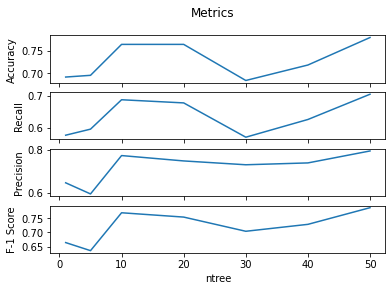

In [ ]:
dataloader = CrossValidation(*load("wine"),5)

tree = Decision_Tree()

classifier = Random_Forest()

experiment(classifier, dataloader,stop_criteria=tree.minimal_size_for_split_stop(50))

ntree  1
Avg. Accuracy  90.80459770114942
Avg. Recall  0.8689839572192513
Avg. Precision  0.8924341100076394
Avg. F-1 Score  0.9000022028753973

ntree  5
Avg. Accuracy  95.63218390804599
Avg. Recall  0.9636029411764706
Avg. Precision  0.9304662904662905
Avg. F-1 Score  0.9428469948921544

ntree  10
Avg. Accuracy  94.02298850574712
Avg. Recall  0.9105169340463458
Avg. Precision  0.9343977591036415
Avg. F-1 Score  0.9371011455079655

ntree  20
Avg. Accuracy  95.17241379310344
Avg. Recall  0.946524064171123
Avg. Precision  0.9303896103896104
Avg. F-1 Score  0.9408698629317225

ntree  30
Avg. Accuracy  96.32183908045977
Avg. Recall  0.9646464646464648
Avg. Precision  0.9427123552123552
Avg. F-1 Score  0.9527888041561997

ntree  40
Avg. Accuracy  95.86206896551724
Avg. Recall  0.9582887700534759
Avg. Precision  0.938254727728412
Avg. F-1 Score  0.9480643662975922

ntree  50
Avg. Accuracy  95.86206896551724
Avg. Recall  0.9581105169340465
Avg. Precision  0.9366013071895424
Avg. F-1 Score  0.

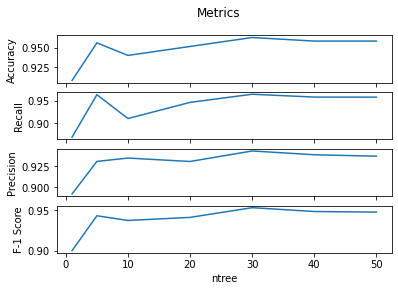

In [ ]:
dataloader = CrossValidation(*load("house_votes"),5)

classifier = Random_Forest()
tree = Decision_Tree()

experiment(classifier, dataloader)

ntree  1
Avg. Accuracy  76.40287769784173
Avg. Recall  0.8469821971341729
Avg. Precision  0.7273274010322545
Avg. F-1 Score  0.743549168076569

ntree  5
Avg. Accuracy  83.02158273381295
Avg. Recall  0.9449468085106384
Avg. Precision  0.7398606602676997
Avg. F-1 Score  0.7803026179013229

ntree  10
Avg. Accuracy  94.67625899280576
Avg. Recall  0.9245567375886525
Avg. Precision  0.9218496062456604
Avg. F-1 Score  0.9340307747691952

ntree  20
Avg. Accuracy  95.39568345323742
Avg. Recall  0.9704787234042552
Avg. Precision  0.9028280542986427
Avg. F-1 Score  0.9275881618368222

ntree  30
Avg. Accuracy  95.8273381294964
Avg. Recall  0.9704787234042553
Avg. Precision  0.9133768468447194
Avg. F-1 Score  0.9352257710736422

ntree  40
Avg. Accuracy  96.54676258992806
Avg. Recall  0.987322695035461
Avg. Precision  0.9181211340849839
Avg. F-1 Score  0.94116287900885

ntree  50
Avg. Accuracy  96.40287769784173
Avg. Recall  0.9704787234042553
Avg. Precision  0.928215269086358
Avg. F-1 Score  0.9456

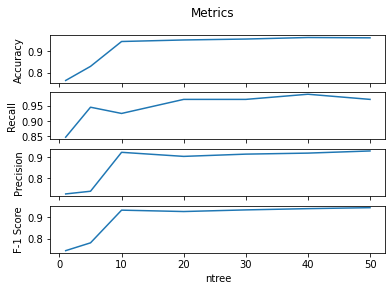

In [ ]:
dataloader = CrossValidation(*load("cancer"),5)

classifier = Random_Forest()

experiment(classifier, dataloader)

/content/drive/My Drive/CS589/H3/cross_validation.py:121: RuntimeWarning: invalid value encountered in double_scalars


ntree  1
Avg. Accuracy  62.90249433106576
Avg. Recall  0.4052310417111176
Avg. Precision  inf
Avg. F-1 Score  nan

ntree  5
Avg. Accuracy  64.71655328798185
Avg. Recall  0.4242736784879768
Avg. Precision  0.439839005879371
Avg. F-1 Score  0.522979324977179

ntree  10
Avg. Accuracy  66.25850340136054
Avg. Recall  0.4543005644998055
Avg. Precision  0.4690743881390322
Avg. F-1 Score  0.5490775259830478

ntree  20
Avg. Accuracy  66.16780045351474
Avg. Recall  0.4517943490903643
Avg. Precision  0.4698924481140817
Avg. F-1 Score  0.5493018829784997

ntree  30
Avg. Accuracy  67.12018140589568
Avg. Recall  0.4689063220846902
Avg. Precision  0.4880900004434385
Avg. F-1 Score  0.5646189347963259

ntree  40
Avg. Accuracy  66.71201814058956
Avg. Recall  0.46467379245605056
Avg. Precision  0.4793075637095271
Avg. F-1 Score  0.5571610792917943

ntree  50
Avg. Accuracy  66.66666666666666
Avg. Recall  0.4634471817237265
Avg. Precision  0.478311948905721
Avg. F-1 Score  0.5563123168045399

Best n :  30

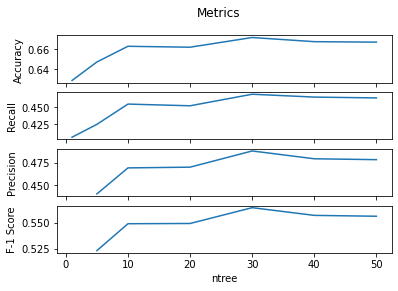

In [ ]:
dataloader = CrossValidation(*load("contraceptive"),10)

classifier = Random_Forest()

experiment(classifier, dataloader)